In [124]:
def fizzbuzz(number):
    fizz = (number % 3) == 0
    buzz = (number % 5) == 0
    
    if fizz and buzz:
        return "fizzbuzz"
    elif fizz:
        return "fizz"
    elif buzz:
        return "buzz"
    else:
        return str(number)

In [125]:
fizzbuzz(3)

'fizz'

In [126]:
for n in range(1,16):
    print(fizzbuzz(n))

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


In [127]:
import random

numbers = random.sample(range(1, 1_000_000), 100_000)
numbers

[551378,
 221547,
 980576,
 390252,
 228220,
 637244,
 434544,
 424882,
 713716,
 626751,
 348428,
 499589,
 822149,
 597026,
 646466,
 380711,
 544406,
 304586,
 249809,
 197358,
 979247,
 213241,
 824074,
 942289,
 787415,
 934006,
 896712,
 19522,
 364551,
 366209,
 542372,
 647466,
 132159,
 756632,
 461335,
 868301,
 358863,
 543656,
 332624,
 373413,
 244039,
 783667,
 386286,
 404697,
 212266,
 363136,
 265155,
 415538,
 708927,
 842239,
 359296,
 575617,
 272350,
 218733,
 598287,
 396168,
 897454,
 187413,
 335225,
 366811,
 973783,
 285065,
 126831,
 696284,
 653388,
 107322,
 368417,
 443380,
 719335,
 520594,
 824263,
 872982,
 902189,
 453527,
 875707,
 168064,
 295859,
 430955,
 327179,
 513238,
 647673,
 248007,
 208873,
 332120,
 119554,
 926196,
 839625,
 229241,
 884260,
 797078,
 890828,
 21580,
 403681,
 78448,
 686401,
 925757,
 609584,
 959082,
 441068,
 288993,
 633185,
 693286,
 270561,
 672507,
 147886,
 786376,
 70781,
 884131,
 289024,
 223863,
 715955,
 9291

In [128]:
import pandas as pd

examples = [(n, fizzbuzz(n)) for n in numbers]

In [129]:
examples = pd.DataFrame(examples, columns=['n', 'fizzbuzz'])
examples.head()

,n,fizzbuzz
0,551378,551378
1,221547,fizz
2,980576,980576
3,390252,fizz
4,228220,buzz


In [130]:
examples['fizz'] = examples['fizzbuzz'].str.contains('fizz')
examples['buzz'] = examples['fizzbuzz'].str.contains('buzz')
examples.head(10)


,n,fizzbuzz,fizz,buzz
0,551378,551378,False,False
1,221547,fizz,True,False
2,980576,980576,False,False
3,390252,fizz,True,False
4,228220,buzz,False,True
5,637244,637244,False,False
6,434544,fizz,True,False
7,424882,424882,False,False
8,713716,713716,False,False
9,626751,fizz,True,False


In [131]:
def bits(number, n_bits=32):
    binary = format(number, 'b').zfill(n_bits)
    return [int(bit) for bit in binary]

In [132]:
bit_columns = ['b{}'.format(n) for n in range(32)]

bit_data = pd.DataFrame([bits(n) for n in examples['n']], columns=bit_columns)
bit_data.head()

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0


In [133]:
examples = pd.concat([examples, bit_data], axis=1)
examples.head()

,n,fizzbuzz,fizz,buzz,b0,b1,b2,b3,b4,b5,...,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31
0,551378,551378,False,False,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,0
1,221547,fizz,True,False,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,1
2,980576,980576,False,False,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,390252,fizz,True,False,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
4,228220,buzz,False,True,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
train_examples, test_examples = train_test_split(examples, test_size=0.2)

In [136]:
train_examples.head()

,n,fizzbuzz,fizz,buzz,b0,b1,b2,b3,b4,b5,...,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31
3131,198662,198662,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
91918,497942,497942,False,False,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
42681,135546,fizz,True,False,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
56665,767645,buzz,False,True,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,1
8158,239899,239899,False,False,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,1


In [137]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    hidden_layer_sizes=[32,],
    verbose=True,
    max_iter=1000
)

In [139]:
classifier.fit(
    train_examples[bit_columns].values,
    train_examples[['fizz', 'buzz']].values,
)

Iteration 1, loss = 1.17563276
Iteration 2, loss = 1.14333891
Iteration 3, loss = 1.14072914
Iteration 4, loss = 1.13958230
Iteration 5, loss = 1.13913258
Iteration 6, loss = 1.13836852
Iteration 7, loss = 1.13792028
Iteration 8, loss = 1.13748522
Iteration 9, loss = 1.13701306
Iteration 10, loss = 1.13645080
Iteration 11, loss = 1.13590892
Iteration 12, loss = 1.13529410
Iteration 13, loss = 1.13477724
Iteration 14, loss = 1.13463467
Iteration 15, loss = 1.13413015
Iteration 16, loss = 1.13407757
Iteration 17, loss = 1.13383098
Iteration 18, loss = 1.13340131
Iteration 19, loss = 1.13301384
Iteration 20, loss = 1.13285446
Iteration 21, loss = 1.13244169
Iteration 22, loss = 1.13202896
Iteration 23, loss = 1.13194235
Iteration 24, loss = 1.13144052
Iteration 25, loss = 1.13083696
Iteration 26, loss = 1.12980461
Iteration 27, loss = 1.12938119
Iteration 28, loss = 1.12885472
Iteration 29, loss = 1.12847392
Iteration 30, loss = 1.12820511
Iteration 31, loss = 1.12775667
Iteration 32, los

Iteration 254, loss = 0.32408158
Iteration 255, loss = 0.32255473
Iteration 256, loss = 0.32104497
Iteration 257, loss = 0.32060118
Iteration 258, loss = 0.31971512
Iteration 259, loss = 0.31768433
Iteration 260, loss = 0.31677027
Iteration 261, loss = 0.31534063
Iteration 262, loss = 0.31424066
Iteration 263, loss = 0.31304141
Iteration 264, loss = 0.31260786
Iteration 265, loss = 0.31156324
Iteration 266, loss = 0.31032693
Iteration 267, loss = 0.30910841
Iteration 268, loss = 0.30833598
Iteration 269, loss = 0.30714197
Iteration 270, loss = 0.30705952
Iteration 271, loss = 0.30575620
Iteration 272, loss = 0.30438165
Iteration 273, loss = 0.30339874
Iteration 274, loss = 0.30296618
Iteration 275, loss = 0.30233103
Iteration 276, loss = 0.30050656
Iteration 277, loss = 0.30017596
Iteration 278, loss = 0.29957379
Iteration 279, loss = 0.29880029
Iteration 280, loss = 0.29732821
Iteration 281, loss = 0.29648988
Iteration 282, loss = 0.29581690
Iteration 283, loss = 0.29542005
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[32], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [140]:
predictions = classifier.predict(test_examples[bit_columns])
predictions

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 1]])

In [141]:
from sklearn import metrics
import matplotlib.pyplot as plt


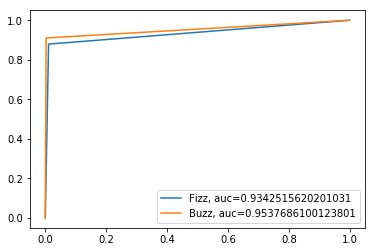

In [142]:
fpr, tpr, _ = metrics.roc_curve(test_examples['fizz'],  predictions[:,0])
auc = metrics.roc_auc_score(test_examples['fizz'],  predictions[:,0])
plt.plot(fpr,tpr,label="Fizz, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(test_examples['buzz'],  predictions[:,1])
auc = metrics.roc_auc_score(test_examples['buzz'],  predictions[:,1])
plt.plot(fpr,tpr,label="Buzz, auc="+str(auc))

plt.legend(loc=4)
plt.show()

In [143]:
def fizzbuzz_ml(number):
    fizz, buzz = classifier.predict([bits(number)])[0]
    
    if fizz and buzz:
        return "fizzbuzz"
    elif fizz:
        return "fizz"
    elif buzz:
        return "buzz"
    else:
        return str(number)

In [145]:
for n in range(1,30):
    print(fizzbuzz_ml(n))

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
fizz
22
23
fizz
buzz
26
fizz
28
29
